In [1]:
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import requests

In [2]:
conn = pymysql.connect(
    host = '172.18.40.65',
    user = 'root',
    passwd = 'root',
    db = 'poker',
    port=3306,
    charset = 'utf8'
)
start = time.time()
df = pd.read_sql('select * from slumbot where name like "{}"'.format("OpenStack_argmax2_30"),conn)

In [4]:
data = df.iloc[:100000]

In [6]:
data.to_csv('result.csv', index=0)

In [31]:
money = np.array(list(map(int, df["win_money"].values)))
for total in range(10000, 199430, 10000):
    x = money[:total]
    print("{}局 总筹码: {:.2f} 平均筹码: {:.2f}".format(x.shape[0], np.sum(x), np.sum(x) / x.shape[0]))
print("{}局 总筹码: {:.2f} 平均筹码: {:.2f}".format(money.shape[0], np.sum(money), np.sum(money) / money.shape[0]))

10000局 总筹码: 122100.00 平均筹码: 12.21
20000局 总筹码: 78400.00 平均筹码: 3.92
30000局 总筹码: 371050.00 平均筹码: 12.37
40000局 总筹码: 387650.00 平均筹码: 9.69
50000局 总筹码: 254000.00 平均筹码: 5.08
60000局 总筹码: 381700.00 平均筹码: 6.36
70000局 总筹码: 614050.00 平均筹码: 8.77
80000局 总筹码: 788350.00 平均筹码: 9.85
90000局 总筹码: 848000.00 平均筹码: 9.42
100000局 总筹码: 871000.00 平均筹码: 8.71
110000局 总筹码: 854850.00 平均筹码: 7.77
120000局 总筹码: 864550.00 平均筹码: 7.20
130000局 总筹码: 965500.00 平均筹码: 7.43
140000局 总筹码: 656050.00 平均筹码: 4.69
150000局 总筹码: 633150.00 平均筹码: 4.22
160000局 总筹码: 588250.00 平均筹码: 3.68
170000局 总筹码: 479150.00 平均筹码: 2.82
180000局 总筹码: 702700.00 平均筹码: 3.90
190000局 总筹码: 877200.00 平均筹码: 4.62
199430局 总筹码: 938450.00 平均筹码: 4.71


In [7]:
def lookup(name):
    conn = pymysql.connect(
        host = '172.18.40.65',
        user = 'root',
        passwd = 'root',
        db = 'poker',
        port=3306,
        charset = 'utf8'
    )
    start = time.time()
    df = pd.read_sql('select * from slumbot where name like "{}"'.format(name),conn)
    print(time.time() - start)
    stat = pd.DataFrame(columns=['srange', 'count'])
    stat.loc[stat.shape[0]] = ["50", 0]
    stat.loc[stat.shape[0]] = ["100", 0]
    stat.loc[stat.shape[0]] = ["100~200", 0]
    stat.loc[stat.shape[0]] = ["200~300", 0]
    stat.loc[stat.shape[0]] = ["300~500", 0]
    stat.loc[stat.shape[0]] = ["500~1k", 0]
    stat.loc[stat.shape[0]] = ["1k~2k", 0]
    stat.loc[stat.shape[0]] = ["2k~3k", 0]
    stat.loc[stat.shape[0]] = ["3k~5k", 0]
    stat.loc[stat.shape[0]] = ["5k~7k", 0]
    stat.loc[stat.shape[0]] = ["7k~1w", 0]
    stat.loc[stat.shape[0]] = ["1w~1.5w", 0]
    stat.loc[stat.shape[0]] = ["1.5w~2w", 0]
    stat.loc[stat.shape[0]] = ["2w", 0]
    x = [50, 100, 101, 201, 301, 501,  1001, 2001, 3001, 5001, 7001, 10001, 15001, 20000] 
    y = [51, 101, 201, 301, 501, 1001, 2001, 3001, 5001, 7001, 10001, 15000, 20000, 20001]
    a = []
    for row in range(df.shape[0]):
        m = int(df.iloc[row, 5])
        a.append(m)
        if abs(m) == 0:
            continue
        count = 0
        for i in range(14):
            if abs(m) >= x[i] and abs(m) < y[i]:
                stat.iloc[i, 1] += m
                count += 1
        if count != 1:
            print(m, count)
    a = np.array(a)
    info = "总局数: {}, 总赢钱: {:.2f}(筹码), 平均 {:.2f} ± {:.2f}(筹码)".format(a.shape[0], np.sum(a), np.mean(a), 1.96 * np.std(a) / np.sqrt(a.shape[0]))
    print(info)
    import matplotlib.pyplot as plt
    plt.rcParams['figure.dpi'] = 400
    plt.figure(figsize=(15, 5))
    sns.barplot(x="srange", y="count", data=stat)
    plt.xlabel('获胜筹码范围', size=12)
    plt.ylabel('\n'.join('总赢钱'), size=12, rotation='horizontal')
    plt.title("{}每局收益筹码分布".format(name), size=15)
    stat = pd.DataFrame(columns=['srange', 'count', 'num'])
    interval = df.shape[0] // 10
    for row in range(df.shape[0]):
        if row % interval == 0:
            month = str(df.iloc[row, -1])[5:7]    
            day = str(df.iloc[row, -1])[8:10]
            hour = str(df.iloc[row, -1])[11:13]    
            minute = str(df.iloc[row,-1])[14:16]
            stat.loc[stat.shape[0]] = ["{}日{}:{}".format(day, hour, minute), 0, 0]
        m = int(df.iloc[row, 5])
        stat.iloc[stat.shape[0] - 1, 1] += m
        stat.iloc[stat.shape[0] - 1, 2] += 1
    print(stat)
    plt.rcParams['figure.dpi'] = 400
    plt.figure(figsize=(15, 5))
    sns.barplot(x="srange", y="count", data=stat)
    plt.xlabel('对打时间', size=12)
    plt.ylabel('\n'.join('平均收益筹码'), size=12, rotation='horizontal')
    plt.title("时间段场均筹码分析", size=15)
    plt.savefig("时间段场均筹码分析.jpg")
    
    url = "https://sc.ftqq.com/SCU122071Tad5363cef228d8f7a9b0f830903cfa325f9c40297f1b8.send"
    params={
        "text": name,
        "desp": info 
    }
    res = requests.get(url=url, params=params)
    

11.065124988555908
总局数: 199293, 总赢钱: 956400.00(筹码), 平均 4.80 ± 6.99(筹码)
      srange    count    num
0   01日09:58    61350  19929
1   01日18:20   330500  19929
2   02日01:55   -62850  19929
3   02日09:14   488750  19929
4   02日21:21    61700  19929
5   03日04:44   -39450  19929
6   03日12:20  -176050  19929
7   04日11:08   -48100  19929
8   04日18:19   139950  19929
9   05日01:30   200100  19929
10  05日09:56      500      3


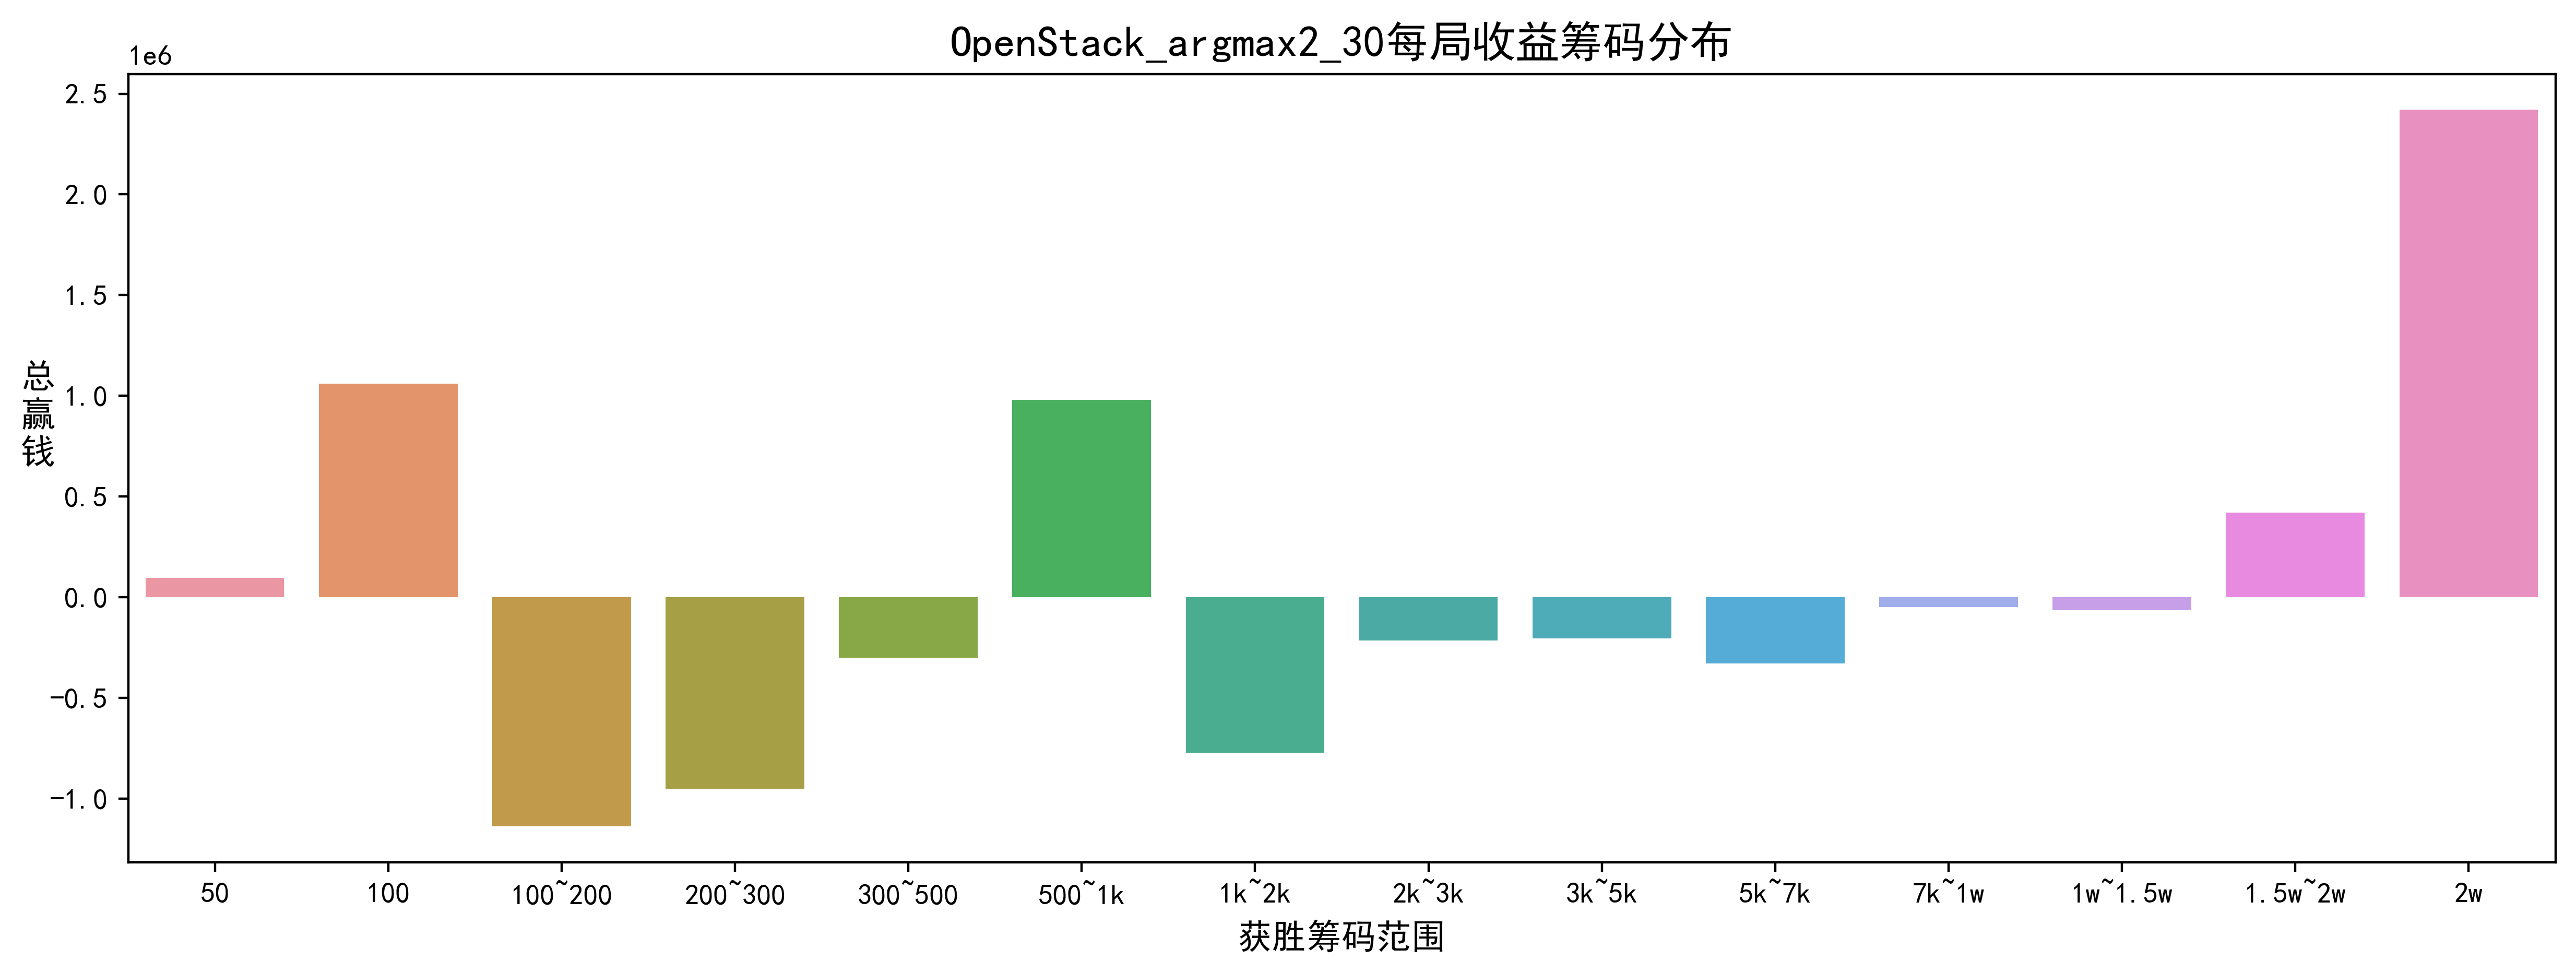

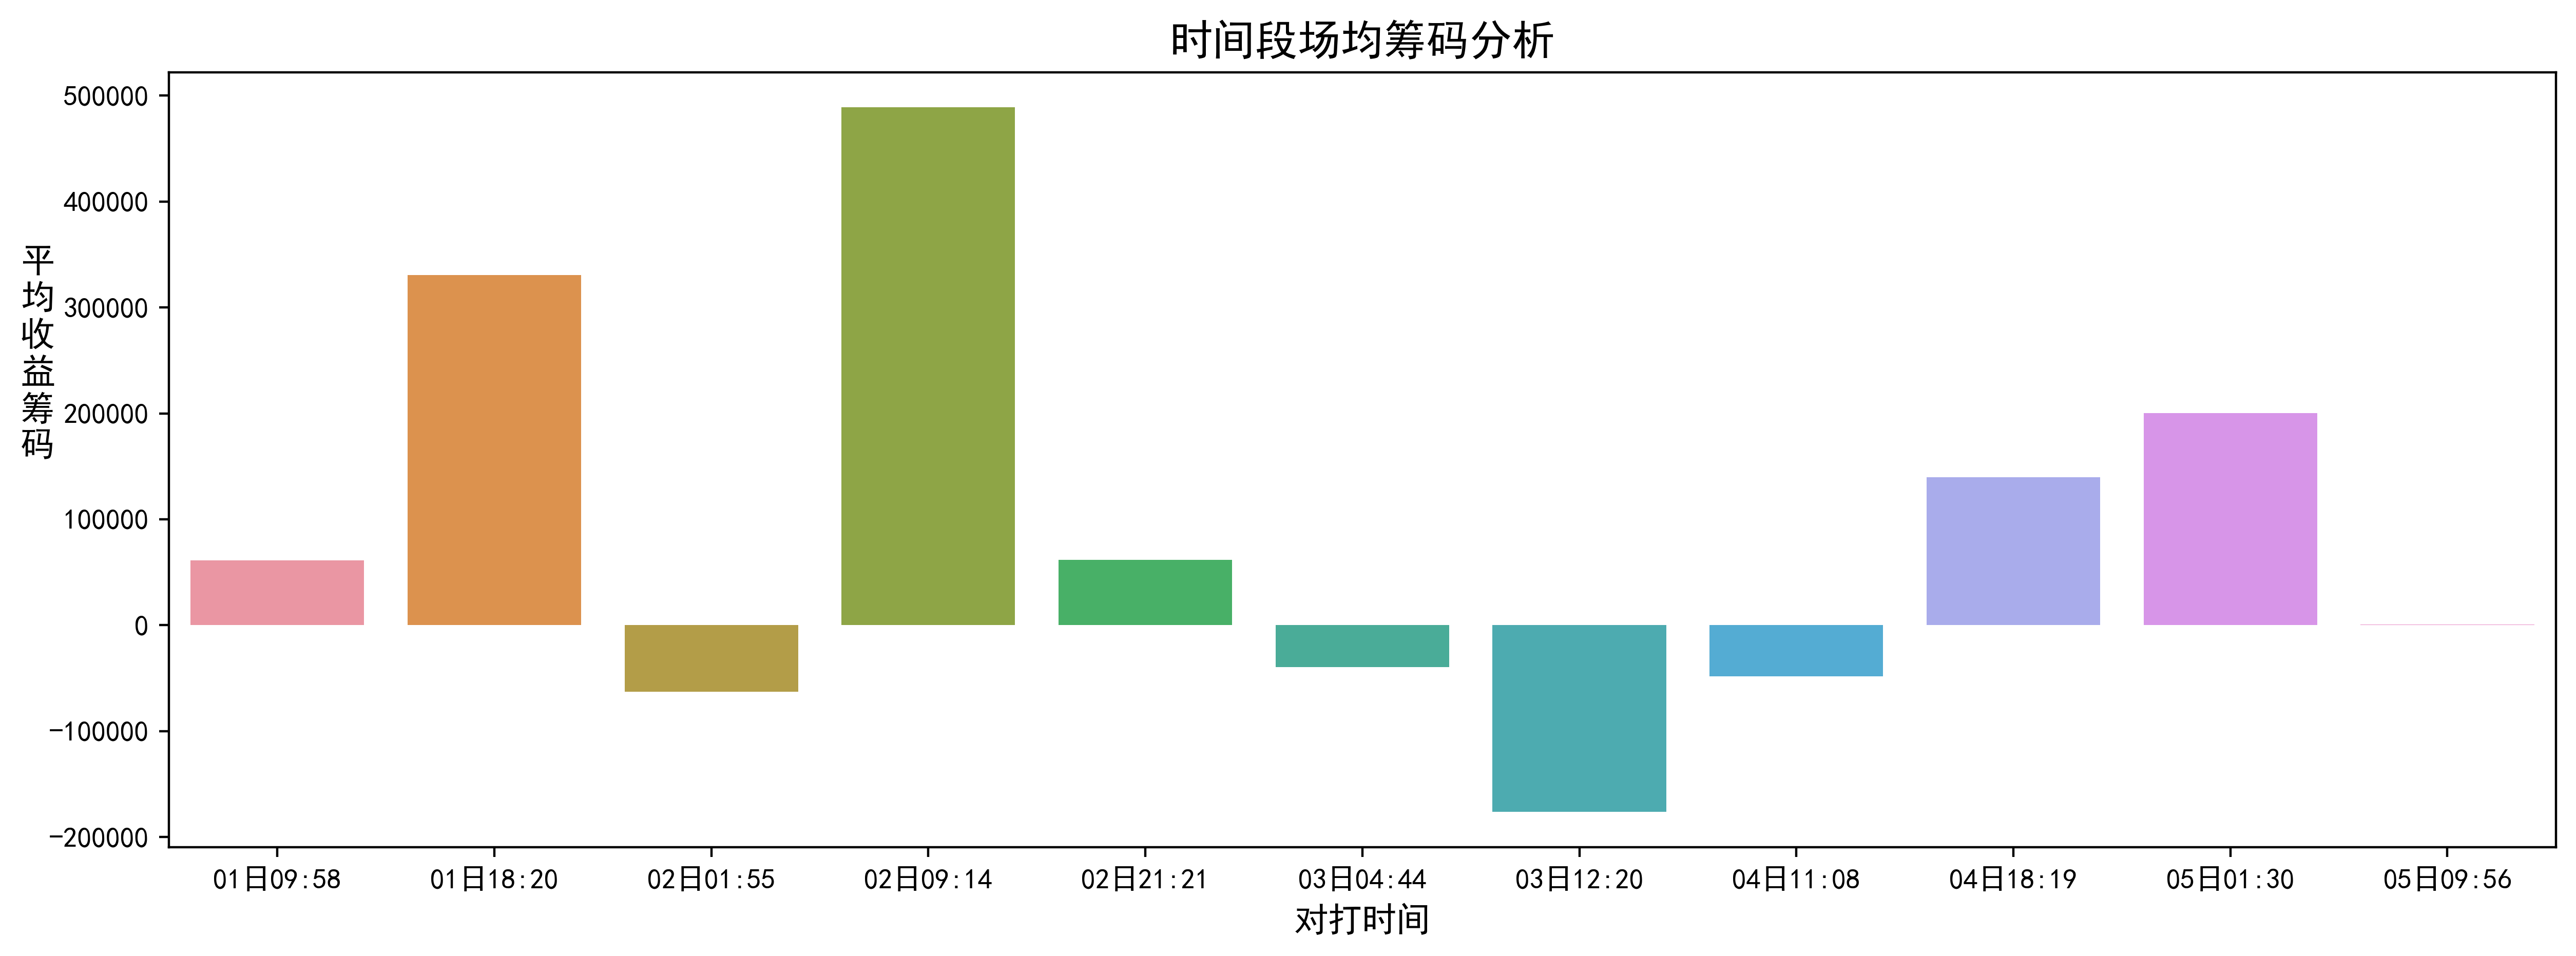

In [8]:
lookup("OpenStack_argmax2_30")

lookup("TestStack_argmax2_30")

5.178621530532837
总局数: 64863, 总赢钱: -61200.00(筹码), 平均 -0.94 ± 11.90(筹码)
      srange   count  num
0   29日00:18   72900  810
1   29日00:47  -14300  810
2   29日01:05   75550  810
3   29日01:23  -38500  810
4   29日01:40   33550  810
..       ...     ...  ...
76  31日11:59   -8900  810
77  31日12:15  -93150  810
78  31日12:32   -7600  810
79  31日12:50  -21100  810
80  31日13:06  -20150   63

[81 rows x 3 columns]


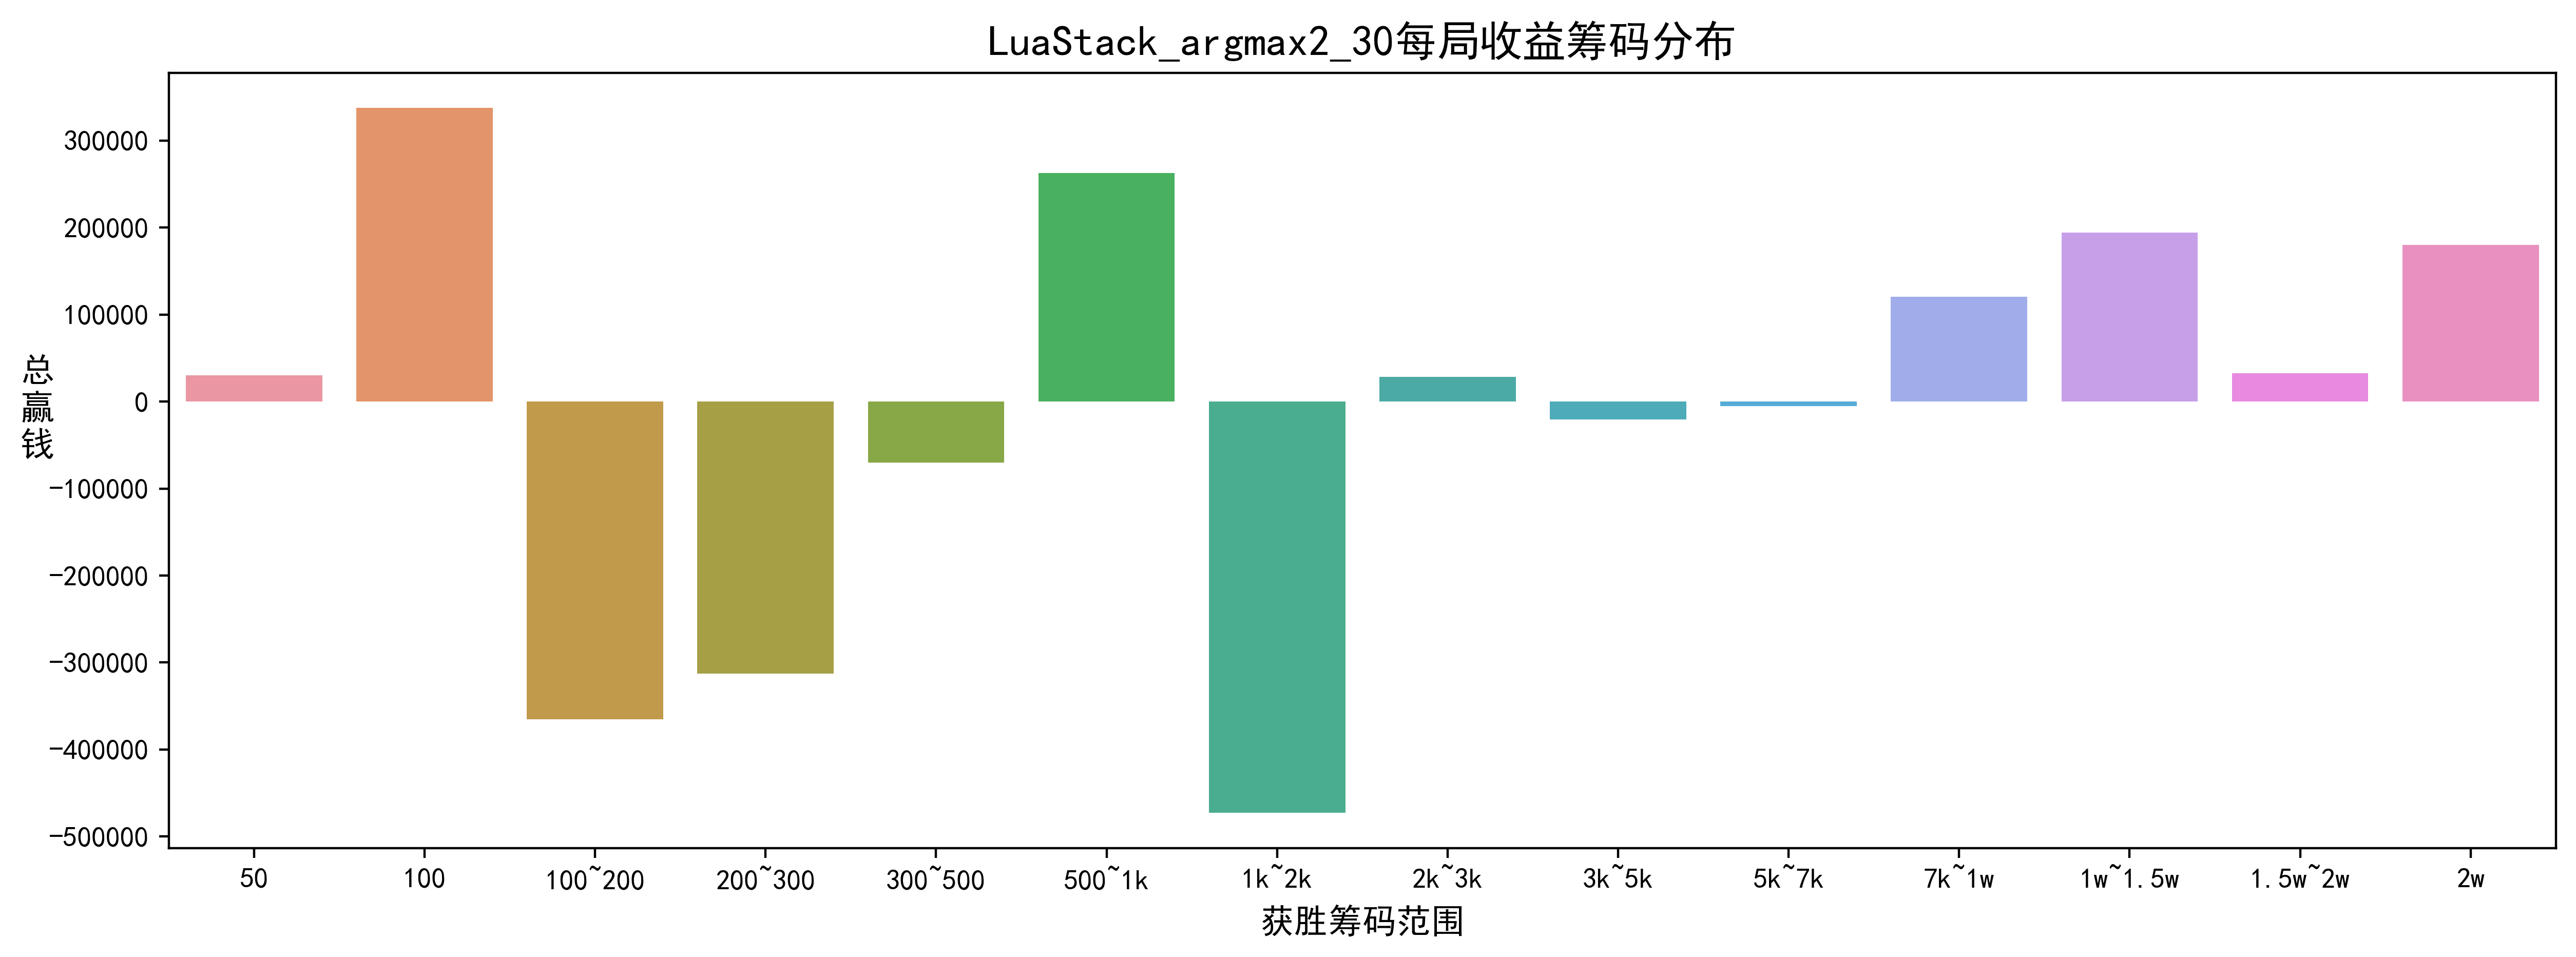

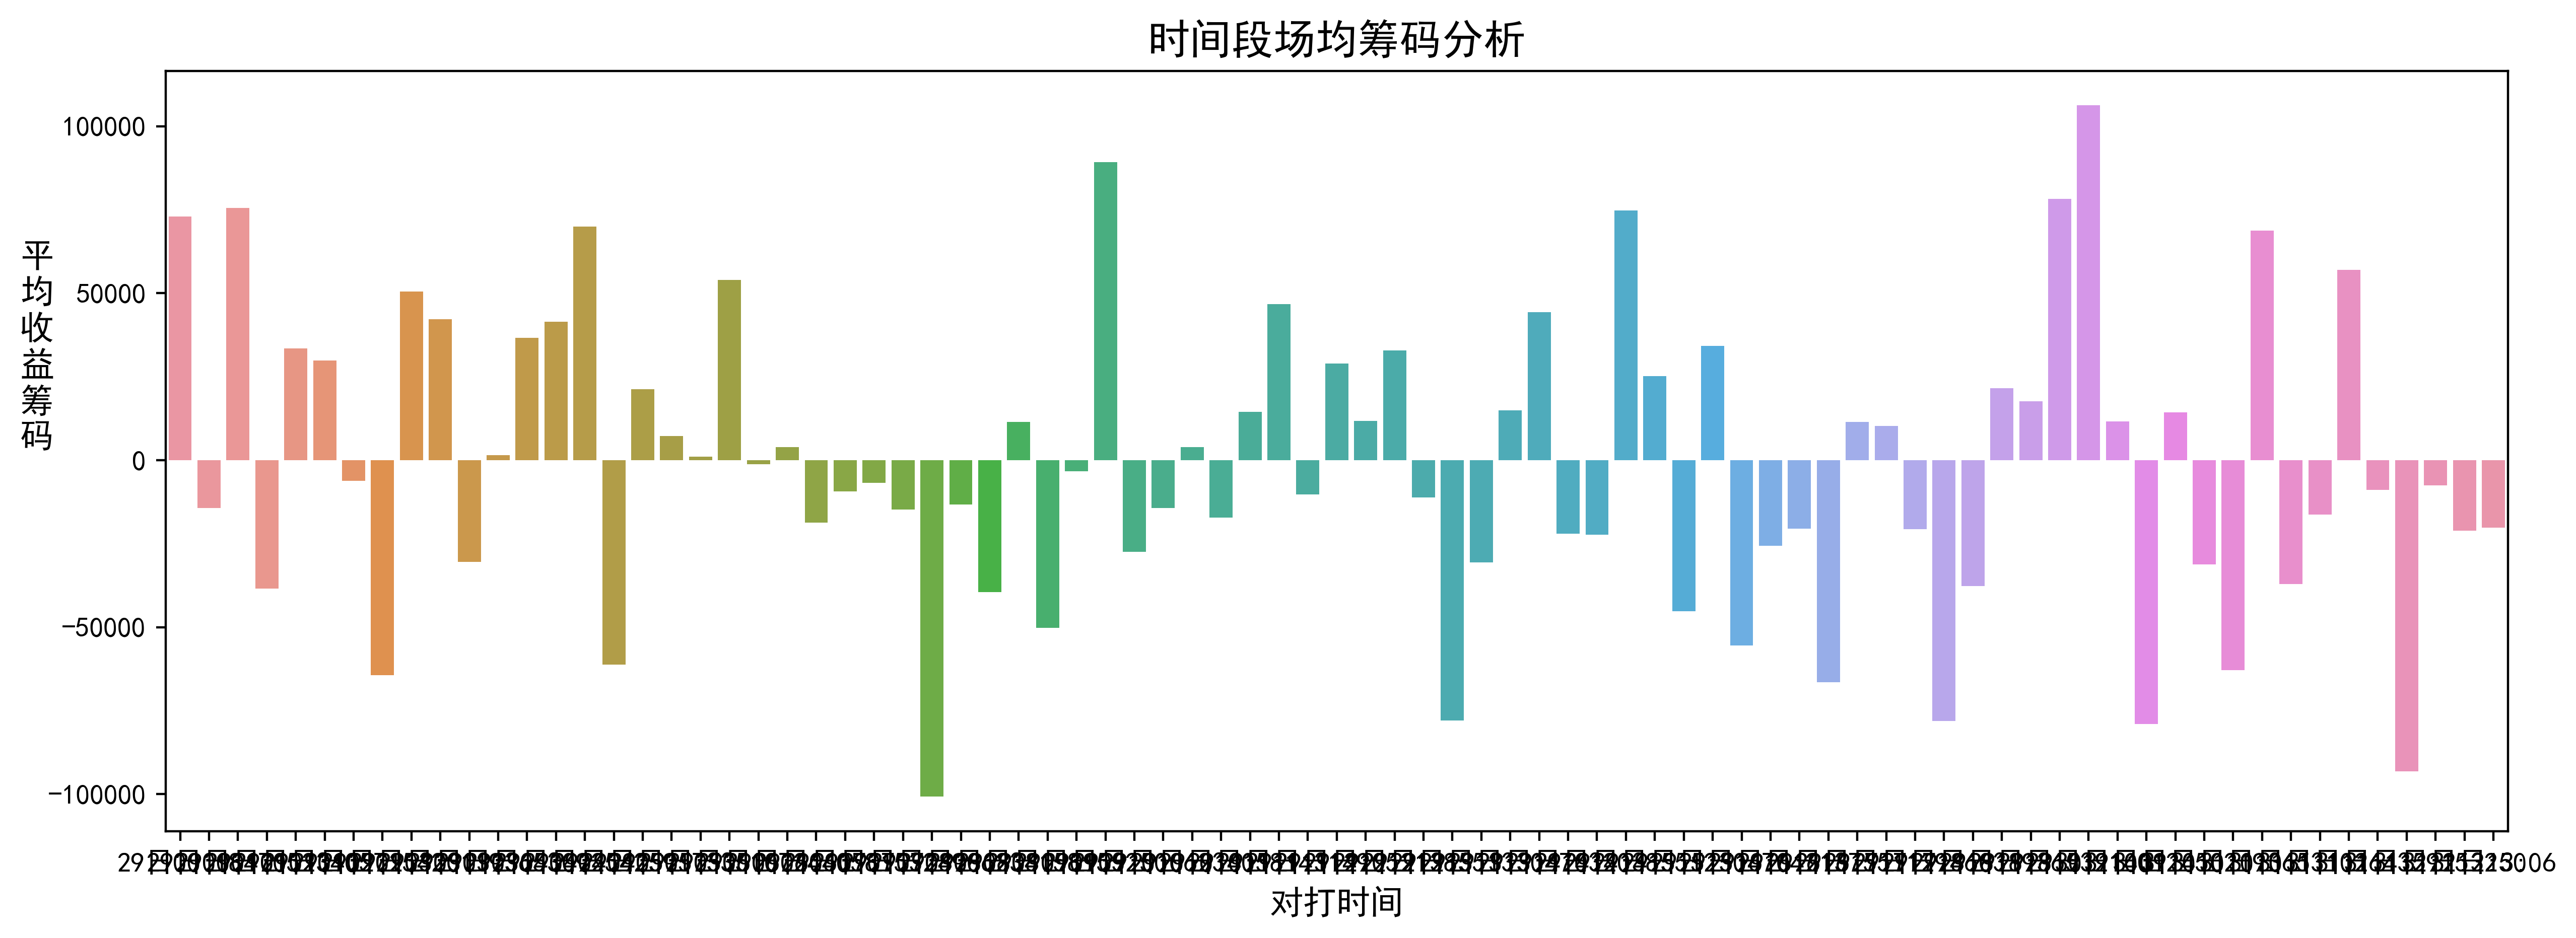

In [20]:
lookup("LuaStack_argmax2_30")

In [ ]:
lookup("TestStack_argmax")

总局数: 25968, 总赢钱: 145150.00(筹码), 平均: 5.59(筹码)


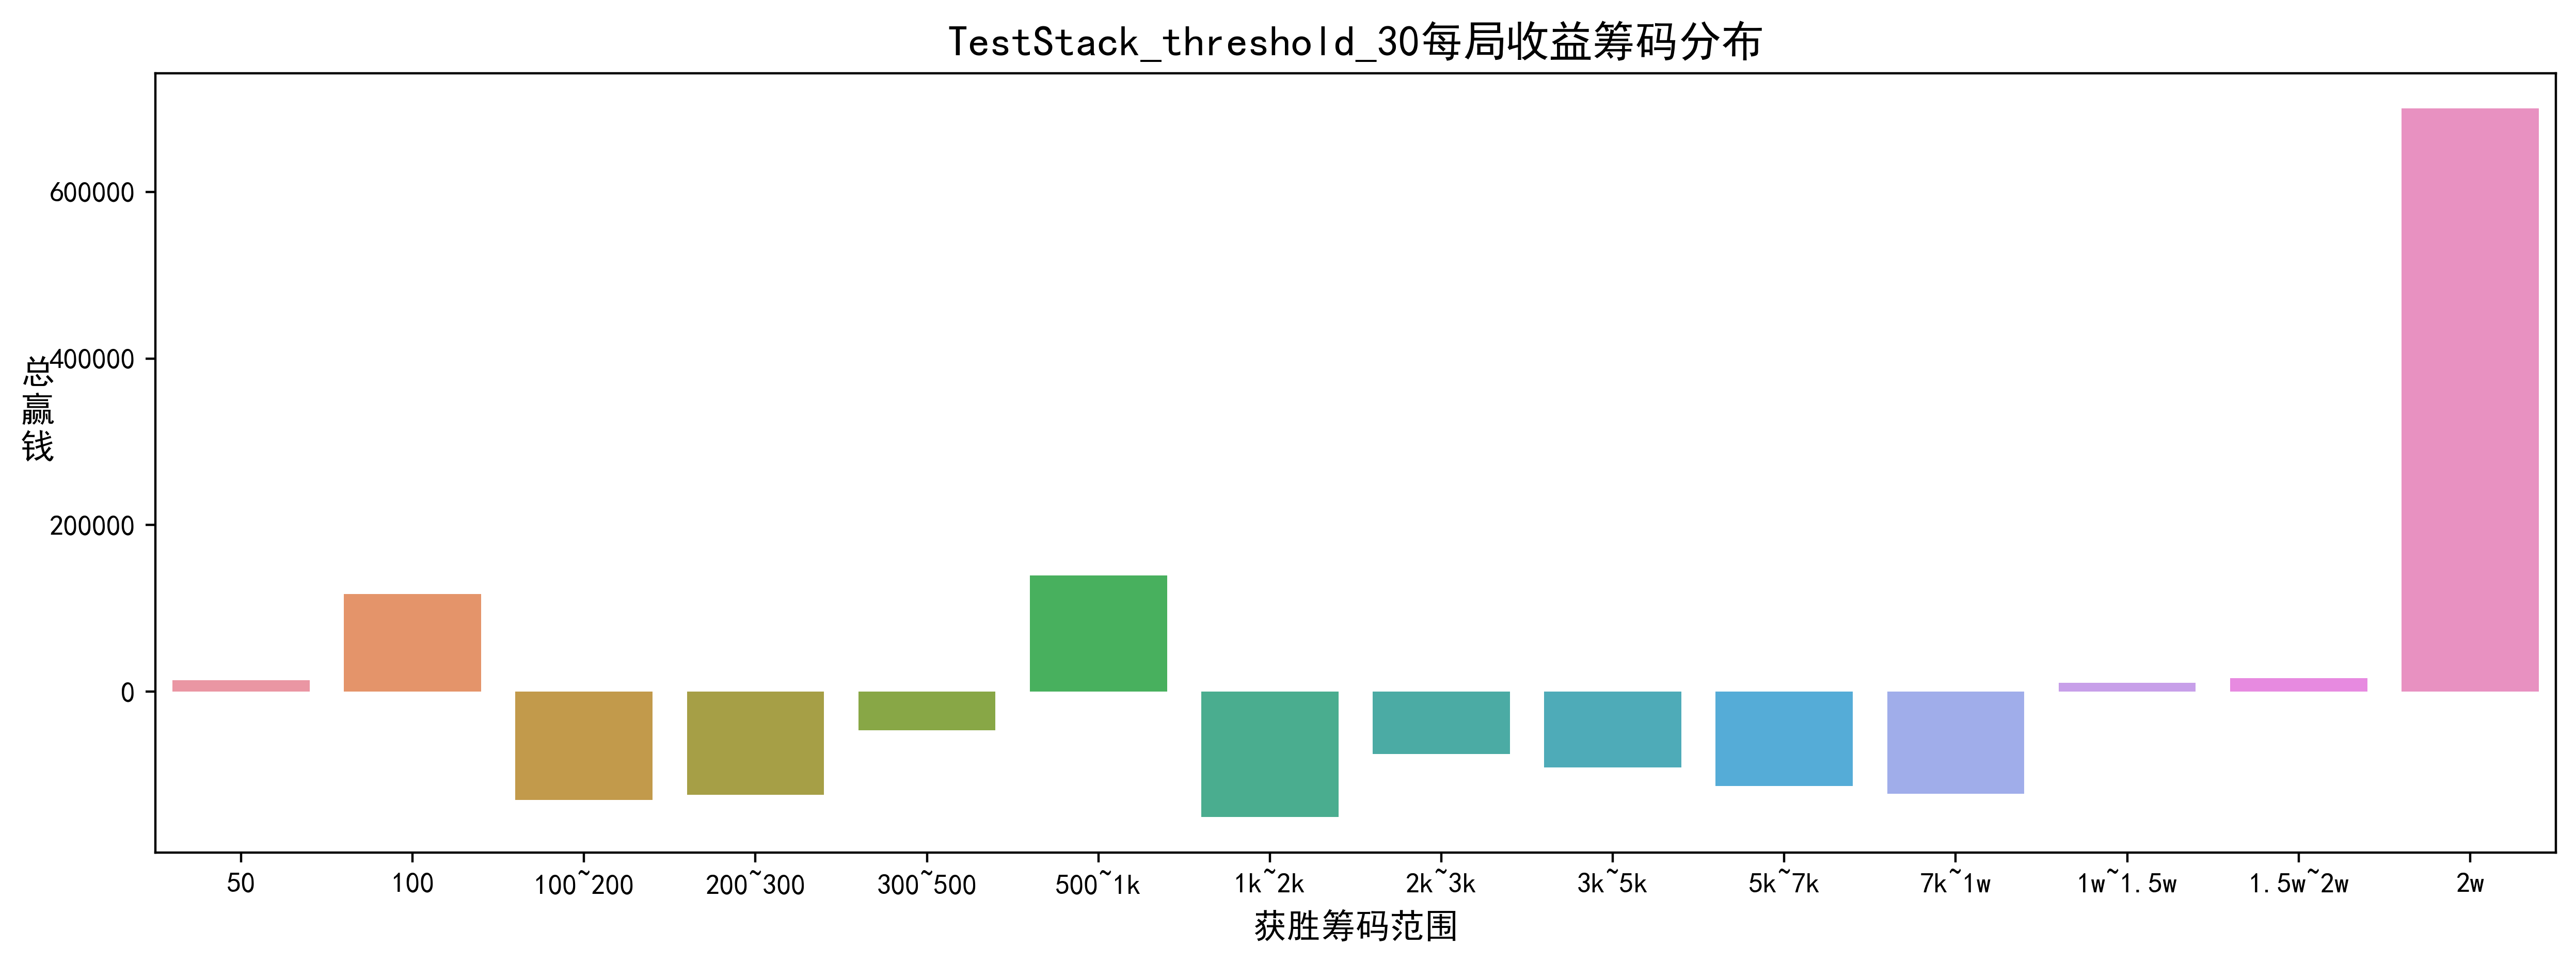

In [107]:
lookup("TestStack_threshold_30")

总局数: 5697, 总赢钱: -36200.00(筹码), 平均: -6.35(筹码)


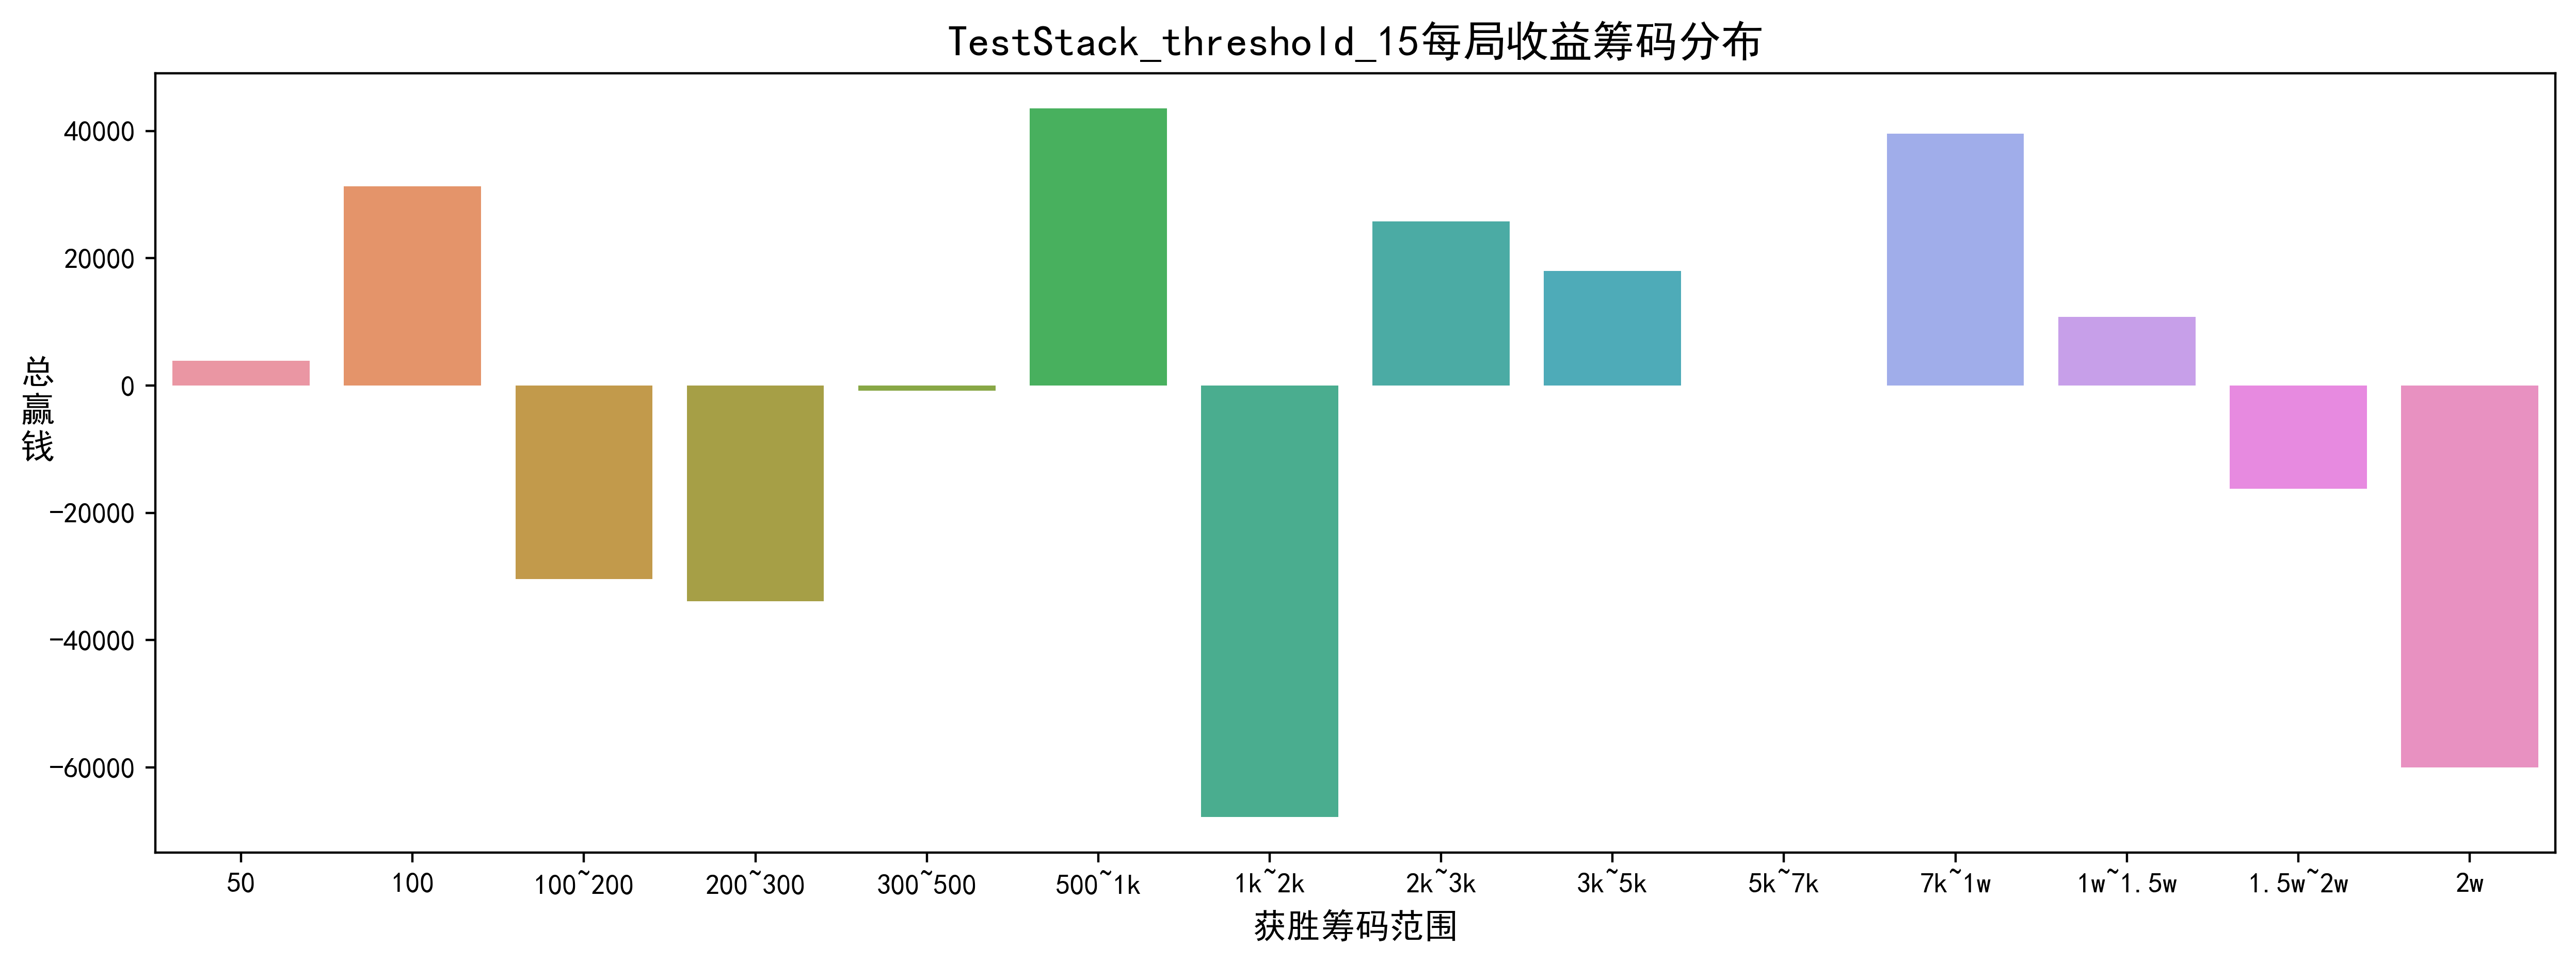

In [104]:
lookup("TestStack_threshold_15")

总局数: 12277, 总赢钱: -353823.00(筹码), 平均: -28.82(筹码)


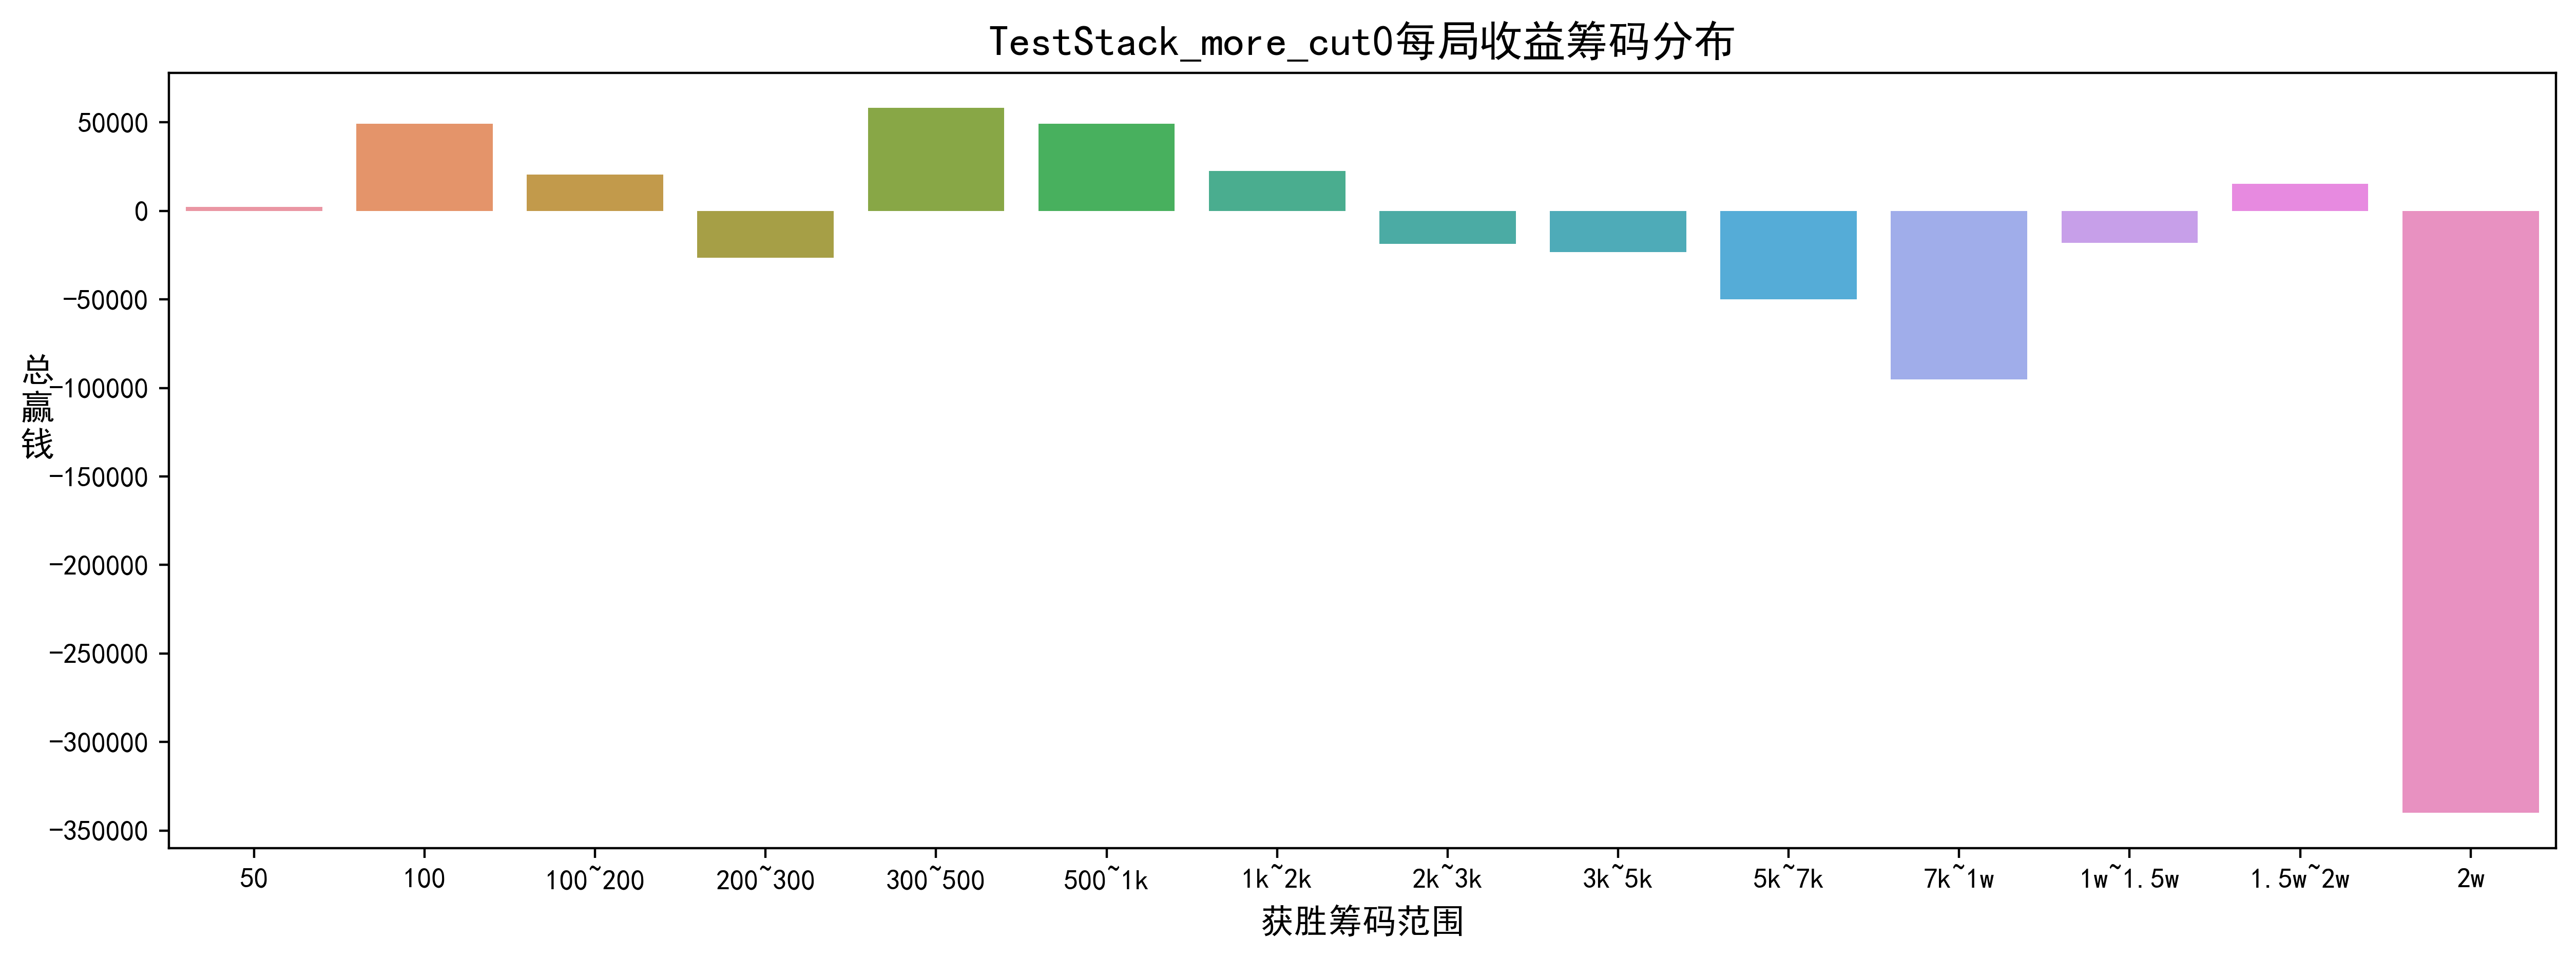

In [105]:
lookup("TestStack_more_cut0")